# Hypothesis Testing Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pydataset import data


## Part 1 - Overview

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?
- Is the website redesign any good?
- Is our television ad driving more sales?

Example 1 - 

Null hypothesis:
- There is no difference between the network latency for our old internet service provider and our new internet service provider. 

Alternative hypothesis:
- We experience more network latency with our new internet service provider compared to our old internet provier.

True positive example:
- When network latency data between the two companies was compared, latency from the new provider was higher.

True negative example:
- When network latency data between the two companies was compared, latency from the new provider was the same as the old provider.

Type 1 error:
- We said that latency from the new provider was higher but when we compared the data, latency levels were actually the same.

Type 2 error:
- We said that latency levels between the two companies were the same but when we compared the data, latency levels at the new company were actually higher.


---

Example 2 - 

Null hypothesis:
- Our redesigned website has experienced the same mean amount of views compared to our original website.

Alternative hypothesis:
- Our redesigned website has experienced a higher mean amount of views compared to our original website.

True positive example:
- When website traffic data was compared, our redesigned website experienced more views than our old website.

True negative example:
- When website traffic data was compared, our redesigned website experienced the same amount of views as our old website.

Type 1 error:
- We said that the redesigned website recieved more views than the old website but when we compared website traffic data, the amount of views was actually the same.

Type 2 error:
- We said that the redesigned website recieved the same amount of views as the old website but when we compared website traffic data, the amount of views for the redesigned website were actually higher.


---

Example 3 - 

Null hypothesis:
- Our average monthly sales is the same as it was before runing our television ad. 

Alternative hypothesis:
- Our average monthly sales is higher than it was before running our television ad.

True positive example:
- When average monthly sales before and after running the television ad were compared, the average was higher after running the ad.

True negative example:
- When average monthly sales before and after running the television ad were compared, the average was the same before and after running the ad.

Type 1 error:
- We said that average monthly sales were higher after running the television ad but when data was compared, the average monthly sales were actually the same.

Type 2 error:
- We said that average monthly sales were the same before and after running the television ad but when data was compared, the average monthly sales were actually higher after running the ad.


---

## Part 2 - T-Test

1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [46]:
#Null Hypothesis: 
#  The average time it takes to sell a home in office 1 = the average time it takes to sell a home in office 2
#Alternative Hypothesis:
#  The average time it takes to sell a home in office 1 != the average time it takes to sell a home in office 2

#use a two tailed T-test

alpha = 0.05

mean1 = 90
sd1 = 15
nums1 = 40

mean2 = 100
sd2 = 20
nums2 = 50


t, p = stats.ttest_ind_from_stats(mean1, sd1, nums1, mean2, sd2, nums2, equal_var=False)
t, p


(-2.7091418459143854, 0.00811206270346016)

In [47]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We do not reject the null hypothesis")

We reject the null hypothesis


2. Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [55]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [56]:
mpg.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [58]:
#drop nulls
mpg = mpg.dropna()

In [27]:
#add a column for overall fuel efficency ((cty + hwy) / 2)
mpg['fuel_eff'] = (mpg.cty + mpg.hwy) / 2

In [34]:
#verify the new column
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


2a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [48]:
#Null hypothesis:
# - fuel efficency for cars made in 2008 = fuel efficency for cars made in 1999
#Alternative Hypothesis:
# - fuel efficency for cars made in 2008 != fuel efficency for cars made in 1999

fe2008 = mpg[mpg.year == 2008].fuel_eff
fe1999 = mpg[mpg.year == 1999].fuel_eff

alpha = 0.05

t, p = stats.ttest_ind(fe2008, fe1999, equal_var=False)
t, p

(-0.21960177245940962, 0.8263750772060638)

In [49]:
if p < alpha:
    print("we reject the null hypothesis")
else:
    print("we do not reject the null hypothesis")

we do not reject the null hypothesis


<AxesSubplot:>

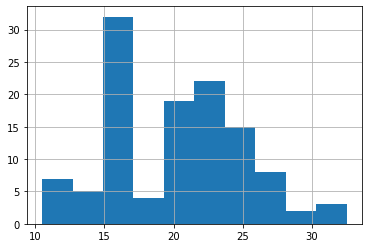

In [60]:
fe2008.hist()

<AxesSubplot:>

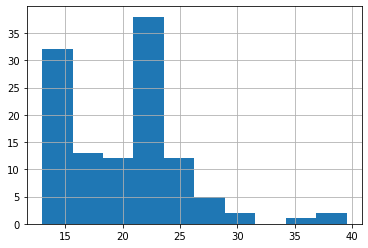

In [61]:
fe1999.hist()

2b. Are compact cars more fuel-efficient than the average car?

In [51]:
#null hypothesis:
# - fuel efficency of compact cars = fuel efficency of the average car (population)
#alternative hypothesis:
# - fuel efficency of compact cars > fuel efficency of the average car (population)

fe_compact = mpg[mpg["class"] == "compact"].fuel_eff
fe_average = np.average(mpg.fuel_eff)

alpha = 0.05

t, p = stats.ttest_1samp(fe_compact, fe_average)
t, p

(7.896888573132535, 4.1985637943171336e-10)

In [69]:
if (p/2 < alpha) & (t > 0):
    print("we reject the null hypothesis")
else:
    print("we do not reject the null hypothesis")

we reject the null hypothesis


<AxesSubplot:>

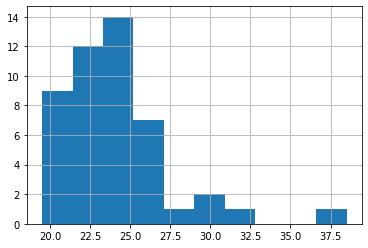

In [62]:
fe_compact.hist()

2c. Do manual cars get better gas mileage than automatic cars?

In [42]:
mpg['is_automatic'] = np.where(mpg.trans.str.startswith('auto'), 'auto', 'man')

In [43]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_eff,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,man
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,man
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,auto


In [53]:
#Null hypothesis:
# - fuel efficenecy of manual cars = fuel efficency of automatic cars
#Alternative Hypothesis:
# - fuel efficency of manual cars > fuel efficency of automatic cars

fe_manual = mpg[mpg.is_automatic == "man"].fuel_eff
fe_auto = mpg[mpg.is_automatic == "auto"].fuel_eff

alpha = 0.05

t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var=False)
t, p

(4.443514012903071, 1.795224899991793e-05)

In [70]:
if (p/2 < alpha) & (t > 0):
    print("we reject the null hypothesis")
else:
    print("we do not reject the null hypothesis")

we reject the null hypothesis


<AxesSubplot:>

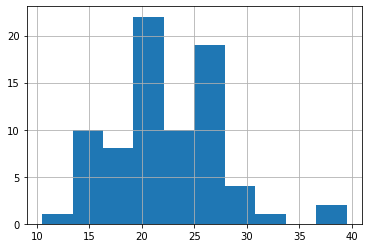

In [64]:
fe_manual.hist()

<AxesSubplot:>

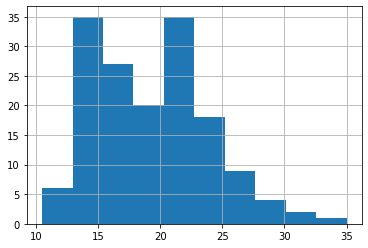

In [65]:
fe_auto.hist()

---

## Part 3 - Correlation

Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [71]:
telco_churn = pd.read_csv('telco_churn.csv')
telco_churn.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


In [72]:
#add a tenure column by dividing the total charges by the monthly charges
telco_churn['tenure'] = telco_churn.total_charges / telco_churn.monthly_charges
#verify the new column
telco_churn.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.044207
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.055092
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.800406
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.631122
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.187128


In [75]:
#remove rows with nan
telco_churn = telco_churn.dropna()

In [76]:
#1a - Does tenure correlate with monthly charges?

#create variable with columns of interest
x = telco_churn.monthly_charges
y = telco_churn.tenure

#run a pearson r test
corr, p = stats.pearsonr(x, y)
corr, p

(0.24616678305992082, 1.1952280758272782e-97)

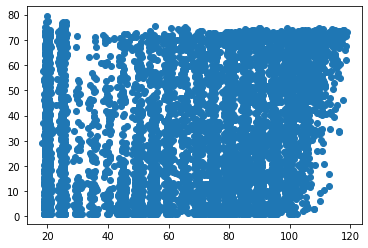

In [157]:
plt.scatter(telco_churn.monthly_charges, telco_churn.tenure)

In [78]:
#1b - Does tenure correlate with total charges?

a = telco_churn.total_charges
y = telco_churn.tenure

corr, p = stats.pearsonr(a, y)
corr, p

(0.8258274352557985, 0.0)

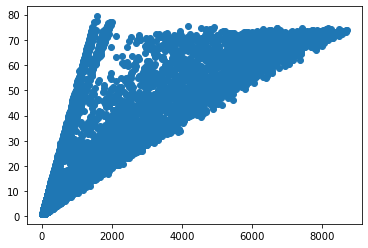

In [158]:
plt.scatter(telco_churn.total_charges, telco_churn.tenure)

In [89]:
#1c - What happens if you control for phone and internet service?

#create variables that include control parameters
phone = telco_churn[(telco_churn.phone_service > 0) & (telco_churn.internet_service == 0)]
internet = telco_churn[(telco_churn.phone_service == 0) & (telco_churn.internet_service > 0)]
phone_and_internet = telco_churn[(telco_churn.phone_service > 0) & (telco_churn.internet_service > 0)]


In [86]:
#monthly charges & tenure / control - phone only
corr, p = stats.pearsonr(phone.monthly_charges, phone.tenure)
corr, p

(0.34630627233809597, 3.7614640834495295e-44)

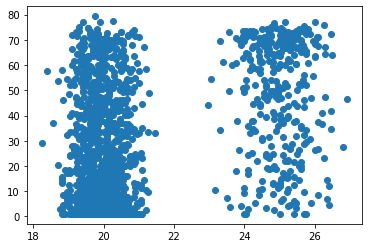

In [159]:
plt.scatter(phone.monthly_charges, phone.tenure)

In [87]:
#monthly charges & tenure / control - internet only
corr, p = stats.pearsonr(internet.monthly_charges, internet.tenure)
corr, p

(0.5929000576209787, 7.050238808018016e-66)

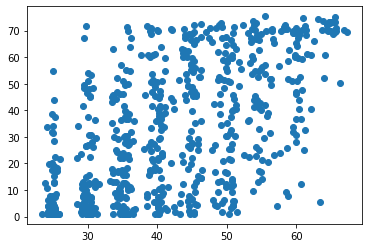

In [160]:
plt.scatter(internet.monthly_charges, internet.tenure)

In [90]:
##monthly charges & tenure / control - phone and internet
corr, p = stats.pearsonr(phone_and_internet.monthly_charges, phone_and_internet.tenure)
corr, p

(0.4434255884865015, 4.939411562216496e-232)

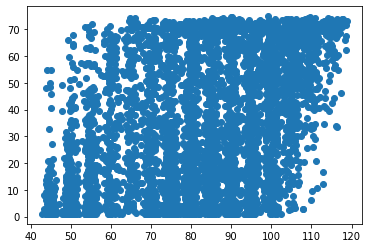

In [161]:
plt.scatter(phone_and_internet.monthly_charges, phone_and_internet.tenure)

In [91]:
#total charges & tenure / control - phone only
corr, p = stats.pearsonr(phone.total_charges, phone.tenure)
corr, p

(0.9842996702809528, 0.0)

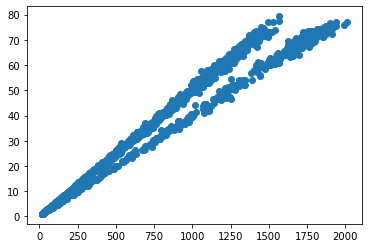

In [162]:
plt.scatter(phone.total_charges, phone.tenure)

In [92]:
#total charges & tenure/ control - internet only
corr, p = stats.pearsonr(internet.total_charges, internet.tenure)
corr, p

(0.9542988226758735, 0.0)

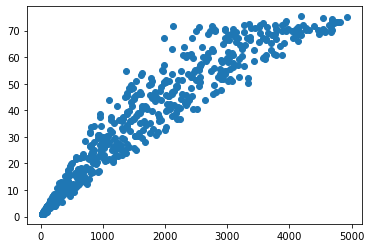

In [163]:
plt.scatter(internet.total_charges, internet.tenure)

In [93]:
#total charges & tenure / control phone and internet
corr, p = stats.pearsonr(phone_and_internet.total_charges, phone_and_internet.tenure)
corr, p

(0.9587705119505586, 0.0)

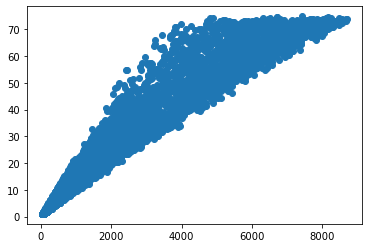

In [165]:
plt.scatter(phone_and_internet.total_charges, phone_and_internet.tenure)

---

Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [98]:
from env import get_db_url

### pull data from sql and add tenure with pandas (not recommended)

In [100]:
emp_sal = pd.read_sql('''SELECT e.emp_no, e.hire_date, s.salary 
FROM employees AS e JOIN salaries AS s USING(emp_no) 
WHERE s.to_date > NOW();''', get_db_url('employees'))

In [105]:
emp_sal.head()

,emp_no,hire_date,salary
0,10001,1986-06-26,88958
1,10002,1985-11-21,72527
2,10003,1986-08-28,43311
3,10004,1986-12-01,74057
4,10005,1989-09-12,94692


In [122]:
#use pd.to_datetime("now") for current date then subtract the "hire_date" 
#after converting it to timestamp type data using pd.to_datetime
emp_sal["time_at_co"] = pd.to_datetime("now") - pd.to_datetime(emp_sal.hire_date)
emp_sal.head()

,emp_no,hire_date,salary,time_at_co
0,10001,1986-06-26,88958,13021 days 21:00:19.977209
1,10002,1985-11-21,72527,13238 days 21:00:19.977209
2,10003,1986-08-28,43311,12958 days 21:00:19.977209
3,10004,1986-12-01,74057,12863 days 21:00:19.977209
4,10005,1989-09-12,94692,11847 days 21:00:19.977209


In [127]:
#use below commented out code to change timestamp to integer 
#by dividing by '1d' (one day) to cancel out the timestamp formatting

#emp_sal.time_at_co = emp_sal.time_at_co / pd.Timedelta('1d')
emp_sal.head()

,emp_no,hire_date,salary,time_at_co
0,10001,1986-06-26,88958,13021.875231
1,10002,1985-11-21,72527,13238.875231
2,10003,1986-08-28,43311,12958.875231
3,10004,1986-12-01,74057,12863.875231
4,10005,1989-09-12,94692,11847.875231


### Adding the tenure column during the sql pull (best way)

In [166]:
#2a - Is there a relationship between how long an employee has been with the company and their salary?

df = pd.read_sql('''SELECT e.emp_no, DATEDIFF(NOW(), e.hire_date) AS tenure, s.salary 
FROM employees AS e JOIN salaries AS s USING(emp_no) WHERE s.to_date > NOW();''', get_db_url('employees'))

In [167]:
df.head()

,emp_no,tenure,salary
0,10001,13021,88958
1,10002,13238,72527
2,10003,12958,43311
3,10004,12863,74057
4,10005,11847,94692


In [136]:
#run a pearson r test to determine correlation
corr, p = stats.pearsonr(df.tenure, df.salary)
corr, p

(0.3064625613186078, 0.0)

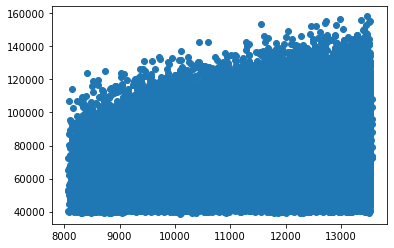

In [168]:
plt.scatter(df.tenure, df.salary)

In [142]:
#2b - Is there a relationship between how long an employee has been with the company 
#and the number of titles they have had?

dff = pd.read_sql('''SELECT e.emp_no, DATEDIFF(NOW(), e.hire_date) AS tenure, COUNT(t.title) AS n_titles 
FROM employees AS e JOIN titles AS t USING(emp_no)  
GROUP BY e.emp_no;''', get_db_url('employees'))


In [144]:
dff.head()

,emp_no,tenure,n_titles
0,10001,13021,1
1,10002,13238,1
2,10003,12958,1
3,10004,12863,2
4,10005,11847,2


In [145]:
#run a pearson r test to determine correlation
corr, p = stats.pearsonr(dff.tenure, dff.n_titles)
corr, p

(0.2665989299136619, 0.0)

---

Use the sleepstudy data. Is there a relationship between days and reaction time?

In [148]:
sns.get_dataset_names()
#ddff = sns.load_dataset("sleepstudy")

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [149]:
#pull the dataset from pydataset
ddff = data("sleepstudy")

In [150]:
#look at the data
ddff.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [151]:
ddff.shape

(180, 3)

In [154]:
#run a pearson r to check correlation
corr, p = stats.pearsonr(ddff.Days, ddff.Reaction)
corr, p

(0.5352302262650253, 9.894096322214812e-15)

## Part 4 - Chi Square

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

 	Codeup Student	Not Codeup Student

Uses a Macbook	49	20

Doesn't Use A Macbook	1	30

Choose another 2 categorical variables from the mpg dataset and perform a 
c
h
i
2
 contingency table test with them. Be sure to state your null and alternative hypotheses.



Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?